<a href="https://colab.research.google.com/github/PalakAggarwal13/MachineLearning/blob/main/MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"] = (df["class"]=="g").astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


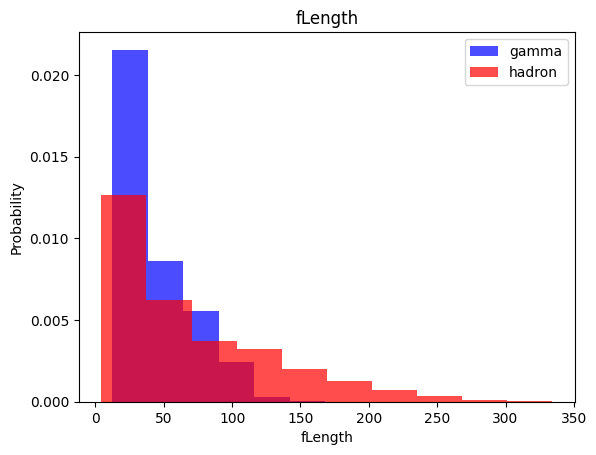

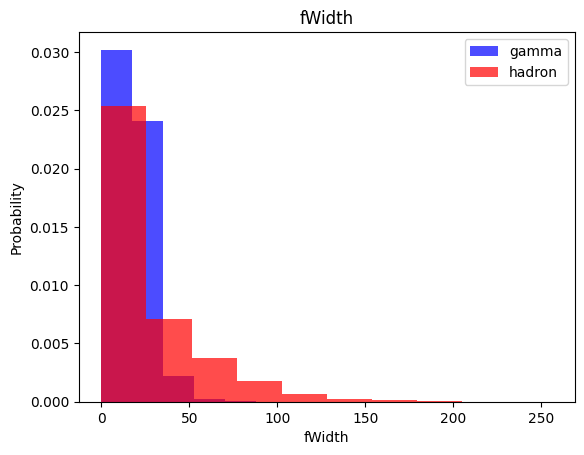

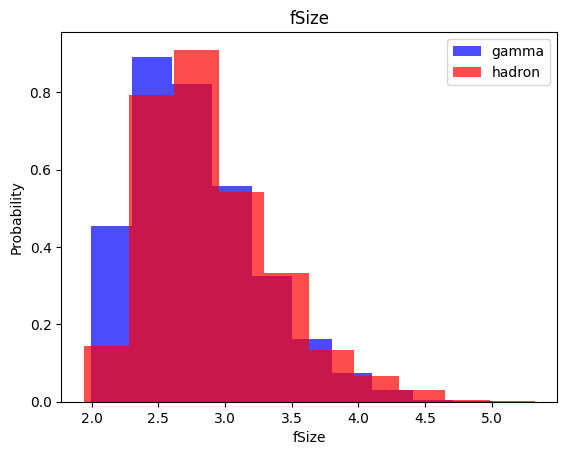

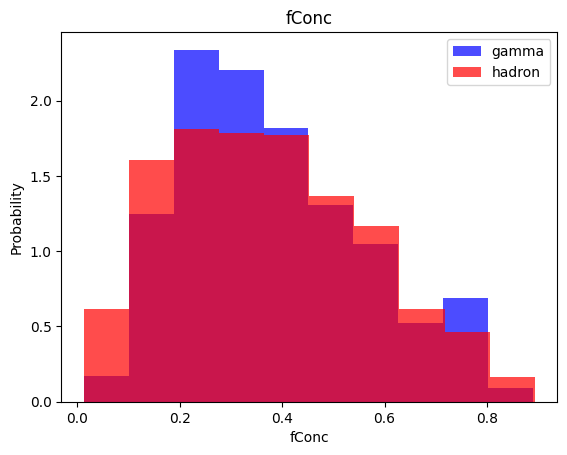

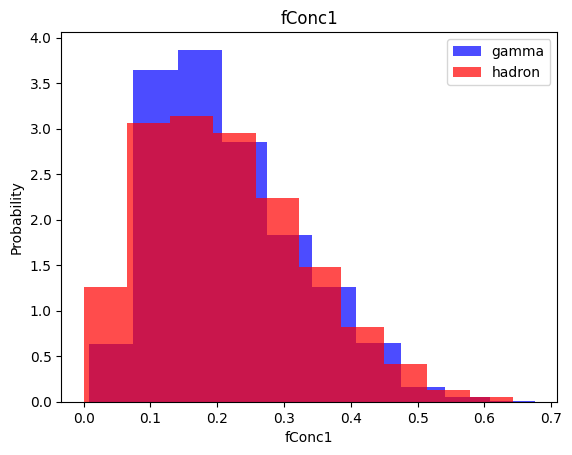

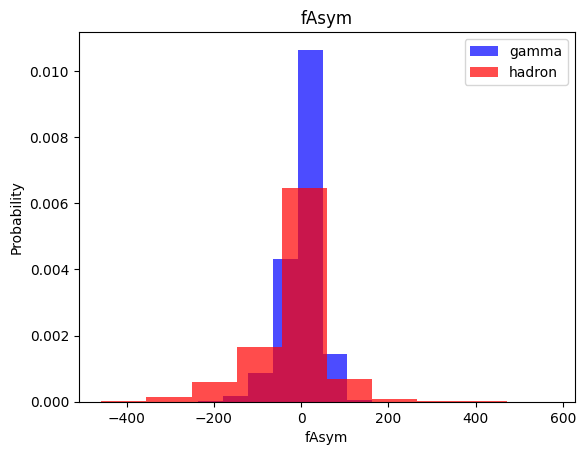

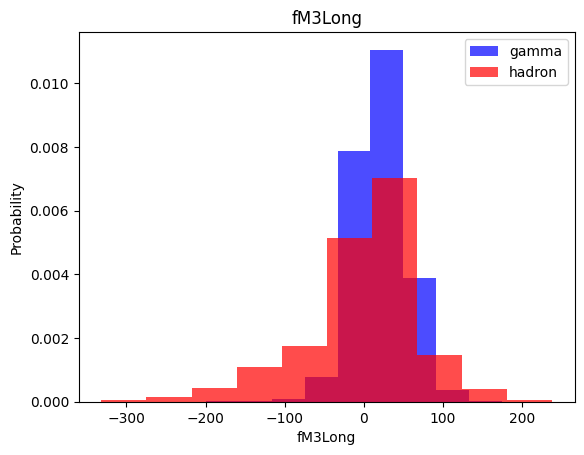

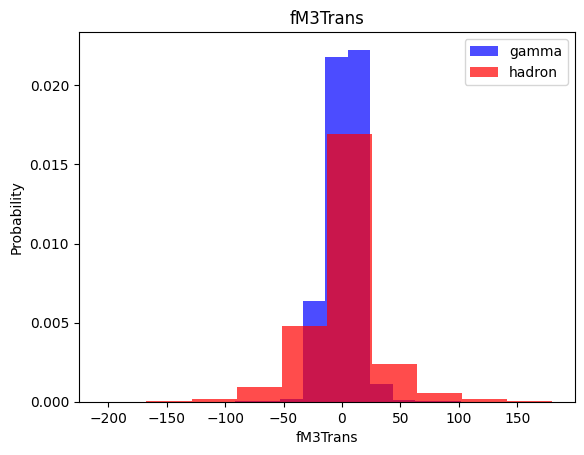

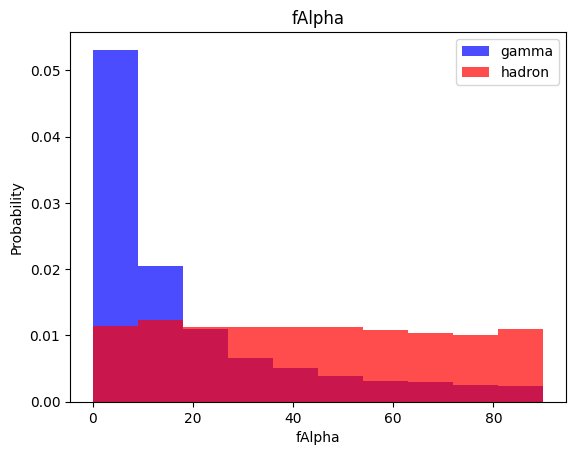

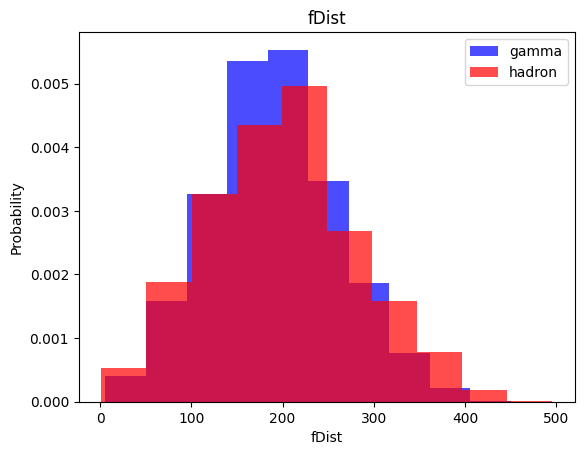

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],label="gamma",color="blue",alpha=0.7,density=True),
  plt.hist(df[df["class"]==0][label],label="hadron",color="red",alpha=0.7,density=True),
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()

# ***TRAIN , VALIDATION , TEST DATASET***

In [ ]:
train , valid , test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_params(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
      ros = RandomOverSampler()
      X,y = ros.fit_resample(X,y)

    data = np.hstack((X , np.reshape(y , (-1,1))))
    return data , X , y

In [ ]:
print(len(train[train[:,-1]==1]))   #gamma
print(len(train[train[:,-1]==0]))   #hadron

7391
7391


In [ ]:
train , X_train , y_train = scale_params(train,oversample=True)
val , X_val , y_val = scale_params(valid,oversample=False)
test , X_test , y_test = scale_params(test,oversample=False)

In [ ]:
len(X_train)

14782

In [ ]:
sum(y_train == 1)

np.int64(7391)

In [ ]:
sum(y_train == 0)

np.int64(7391)

## ***K Nearest Neighbors***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
y_test

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1332
           1       0.86      0.86      0.86      2472

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# **KNN Manual Implementation**


In [ ]:
from collections import Counter

In [ ]:
def euclidean_distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
def fit_knn(X_train,y_train):
  return X_train,y_train

In [ ]:
def predict_one(X_train,y_train,x_test,k):
  distances = [euclidean_distance(x_test, x) for x in X_train]
  k_indices = np.argsort(distances)[:k]
  k_nearest_labels = [y_train[i] for i in k_indices]
  most_common = Counter(k_nearest_labels).most_common(1)
  return most_common[0][0]

In [ ]:
def predict_knn(X_train,y_train,X_test,k=3):
  return np.array([predict_one(X_train,y_train,x,k) for x in X_test])

In [ ]:
X_train_stored, y_train_stored = fit_knn(X_train[:100], y_train[:100])
predictions = predict_knn(X_train_stored, y_train_stored, X_test[:100], k=3)
print("Predictions:", predictions)

Predictions: [1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0]


In [ ]:
print(classification_report(y_test[:100],predictions))

              precision    recall  f1-score   support

           0       0.62      0.24      0.34        42
           1       0.62      0.90      0.73        58

    accuracy                           0.62       100
   macro avg       0.62      0.57      0.54       100
weighted avg       0.62      0.62      0.57       100



# ***NAIVE BAYES***

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.41      0.52      1332
           1       0.74      0.91      0.82      2472

    accuracy                           0.74      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.74      0.71      3804



# ***NAIVE BAYES MANUAL IMPLEMENTATION***

In [ ]:
def gaussian_pdf(x,mean,var):
  eps = 1e-6
  coeff = 1 / np.sqrt(2.0 * np.pi * var + eps)
  exponent = np.exp(-((x-mean)**2)/(2 * var + eps))
  return coeff * exponent

In [ ]:
def summarize_by_class(X,y):
  summaries={}
  labels = np.unique(y)
  for c in labels:
    X_c = X[y==c]
    summaries[c] = {
        "mean" : X_c.mean(axis=0),
        "variance" : X_c.var(axis=0),
        "prior" : X_c.shape[0]/X.shape[0]
    }
  return summaries

In [ ]:
def calculate_class_probabilities(summaries,x):
  probs = {}
  for c , stats in summaries.items():
    prior = stats["prior"]
    likelihoods = gaussian_pdf(x,stats["mean"],stats["variance"])
    total_likelihoods = np.prod(likelihoods)
    probs[c] = prior * total_likelihoods
  return probs

In [ ]:
def predict_one(summaries,x):
  probs = calculate_class_probabilities(summaries,x)
  return max(probs,key=probs.get)

In [ ]:
def predict_nb(X_train,y_train,X_test):
    summaries = summarize_by_class(X_train,y_train)
    return np.array([predict_one(summaries,x) for x in X_test])

In [ ]:
predictions = predict_nb(X_train[:100],y_train[:100],X_test[:100])
print("Predictions:",predictions)

Predictions: [1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]


In [ ]:
print(classification_report(y_test[:100],predictions))

              precision    recall  f1-score   support

           0       0.78      0.33      0.47        42
           1       0.66      0.93      0.77        58

    accuracy                           0.68       100
   macro avg       0.72      0.63      0.62       100
weighted avg       0.71      0.68      0.64       100



# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1332
           1       0.84      0.83      0.84      2472

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# **LOGISTIC REGRESSION MANUAL IMPLEMENTATION**

In [ ]:
def sigmoid(z):
  return 1 / (1+np.exp(-z))

In [ ]:
def compute_cost(X,y,w,b):
  m = X.shape[0]
  eps = 1e-15
  z = np.dot(X,w)+b
  f_wb = sigmoid(z)
  cost = (-1/m )*(np.sum(y*np.log(f_wb+eps)+(1-y)*np.log(1-f_wb+eps)))
  return cost

In [ ]:
def compute_gradient(X,y,w,b):
  m = X.shape[0]
  eps = 1e-15
  z = np.dot(X,w)+b
  f_wb = sigmoid(z)
  dJ_dw = (1/m) * np.dot((f_wb - y),X)
  dJ_db = (1/m) * (np.sum(f_wb - y))
  return dJ_dw , dJ_db

In [ ]:
def train_logistic_regression(X,y,lr=0.01,num_iters=1000):
  n = X.shape[1]
  w = np.zeros(n)
  b = 0

  for i in range(num_iters):
    dJ_dw , dJ_db = compute_gradient(X,y,w,b)
    w -= lr * dJ_dw
    b -= lr * dJ_db

    if i%100==0:
      cost = compute_cost(X,y,w,b)
      print(f"Iteration {i}: Cost = {cost:.4f}")

  return w, b

In [ ]:
def predict(X,w,b):
  probs = sigmoid(np.dot(X,w)+b)
  return (probs>=0.5).astype(int)

In [ ]:
w, b = train_logistic_regression(X_train, y_train, lr=0.1, num_iters=1000)

Iteration 0: Cost = 0.6804
Iteration 100: Cost = 0.5022
Iteration 200: Cost = 0.4927
Iteration 300: Cost = 0.4900
Iteration 400: Cost = 0.4888
Iteration 500: Cost = 0.4882
Iteration 600: Cost = 0.4878
Iteration 700: Cost = 0.4875
Iteration 800: Cost = 0.4873
Iteration 900: Cost = 0.4872


In [ ]:
preds = predict(X_test, w, b)
print("Predictions:", preds)

Predictions: [1 1 0 ... 1 1 0]


In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1332
           1       0.84      0.83      0.84      2472

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# ***SUPPORT VECTOR MACHINES(SVM)***

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1332
           1       0.89      0.89      0.89      2472

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# **SUPPORT VECTOR MACHINES (SVM) MANUAL IMPLEMENTATION**

In [ ]:
def svm_train(X,y, learning_rate=0.01,lambda_param=0.01,epochs=1000):
  m , n = X.shape
  w = np.zeros(n)
  b = 0

  y_ = np.where(y <= 0 , -1 , 1)

  for epoch in range(epochs):
    for i in range(m):
      condition = y_[i] * ( np.dot( X[i] , w ) + b ) >= 1
      if condition:
        w -= learning_rate * (2 * lambda_param * w)
      else:
        w -= learning_rate * (2 * lambda_param * w - np.dot( X[i],y_[i] ))
        b -= learning_rate * y_[i]

  return w , b

In [ ]:
def svm_predict(X, w, b):
    return np.where(np.dot(X, w) + b >= 0, 1, 0)

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0)
y = y.astype(int)

w, b = svm_train(X, y, learning_rate=0.001, lambda_param=0.01, epochs=1000)
predictions = svm_predict(X, w, b)

In [ ]:
w, b = svm_train(X_train[:100], y_train[:100], learning_rate=0.001, lambda_param=0.01, epochs=1000)
predictions = svm_predict(X_test[:100], w, b)

In [ ]:
print(classification_report(y_test[:100],predictions))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        42
           1       0.00      0.00      0.00        58

    accuracy                           0.42       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.42      0.25       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **NEURAL NETWORK IMPLEMENTATION**

In [5]:
import tensorflow as tf

In [59]:
def plot_history(history):
  fig , (ax1,ax2) = plt.subplots(1,2,figsize = (10,4))
  ax1.plot(history.history['loss'] , label='loss')
  ax1.plot(history.history['val_loss'] , label= 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'] , label='accuracy')
  ax2.plot(history.history['val_accuracy'] , label= 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):

  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr),
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

  history = nn_model.fit(
    X_train , y_train , epochs=epochs , batch_size=batch_size , validation_data=(X_val, y_val) , verbose=0
  )

  return nn_model , history

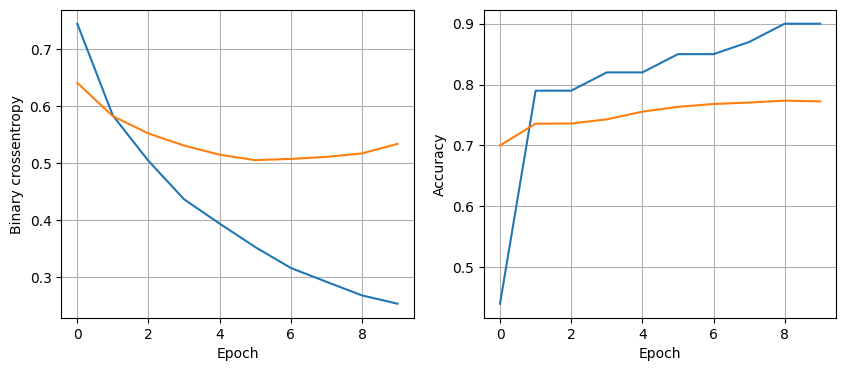

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7696 - loss: 0.5591 


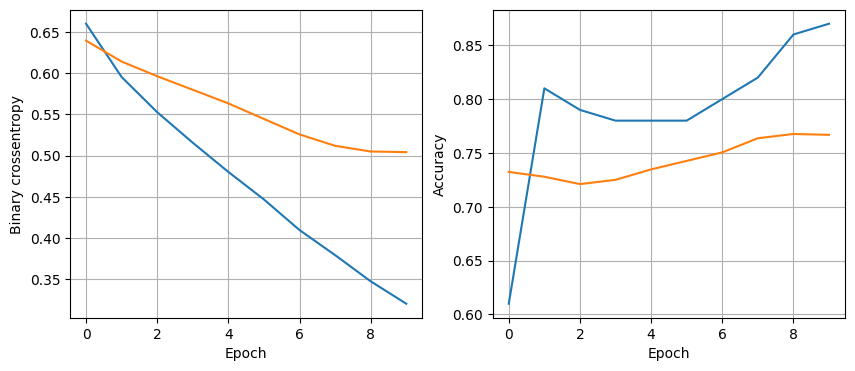

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7905 - loss: 0.5047 


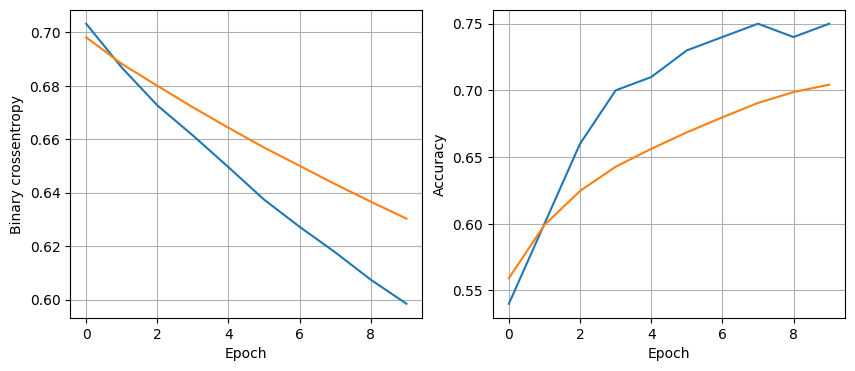

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7583 - loss: 0.6312 


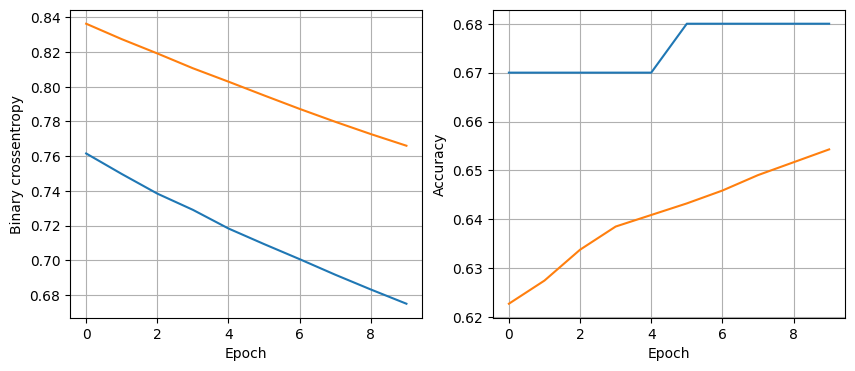

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7000 - loss: 0.6874 


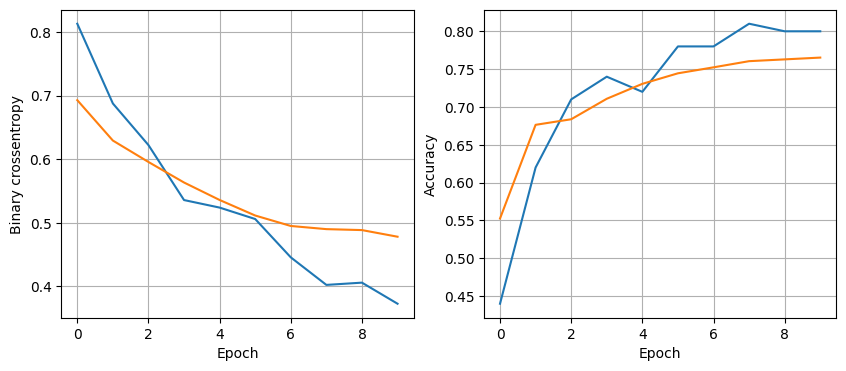

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7615 - loss: 0.4788 


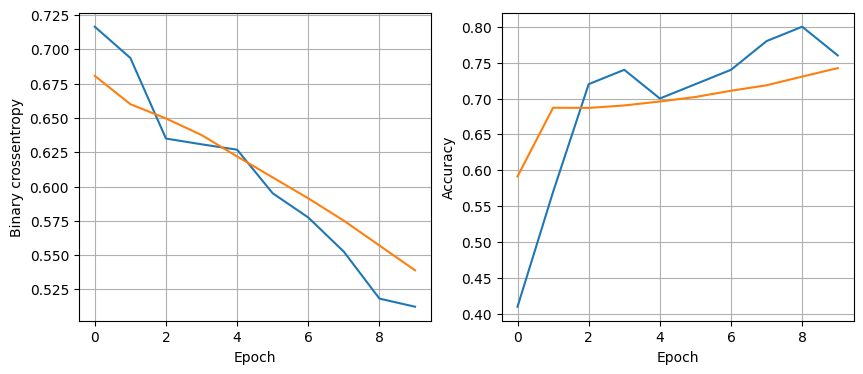

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7615 - loss: 0.5193 


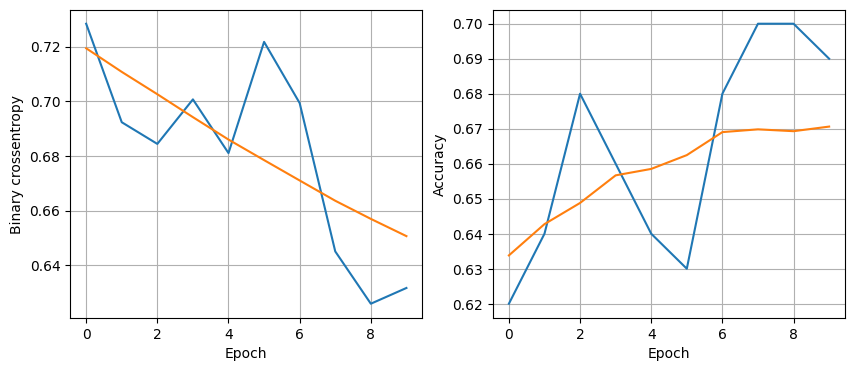

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7215 - loss: 0.6187


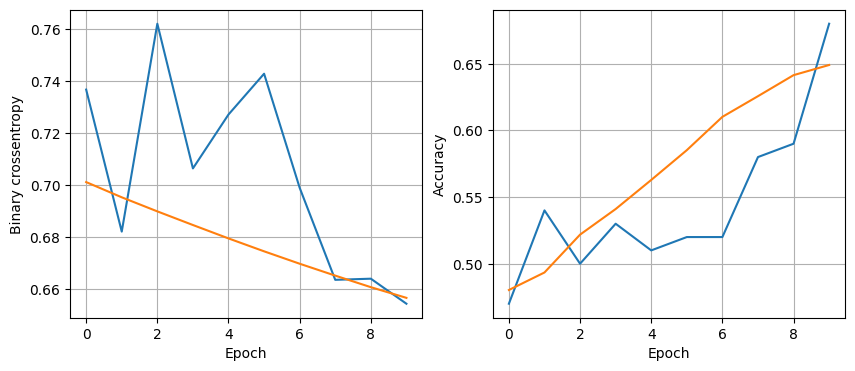

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5874 - loss: 0.6818


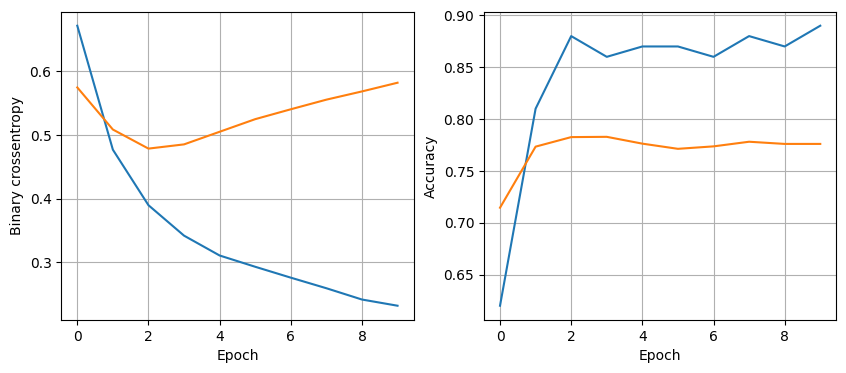

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7656 - loss: 0.6097


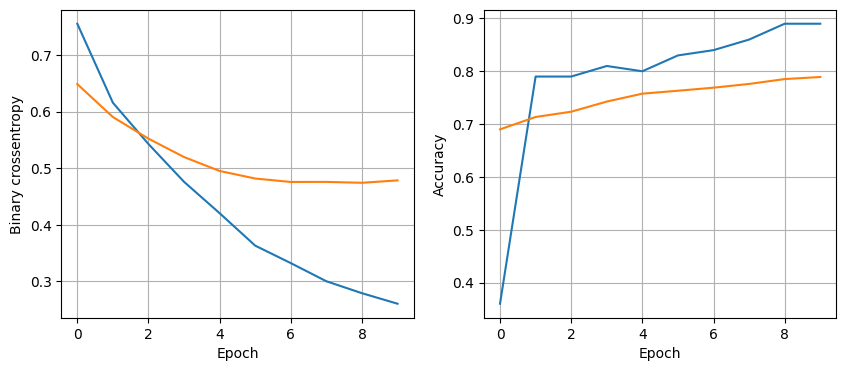

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7884 - loss: 0.5289


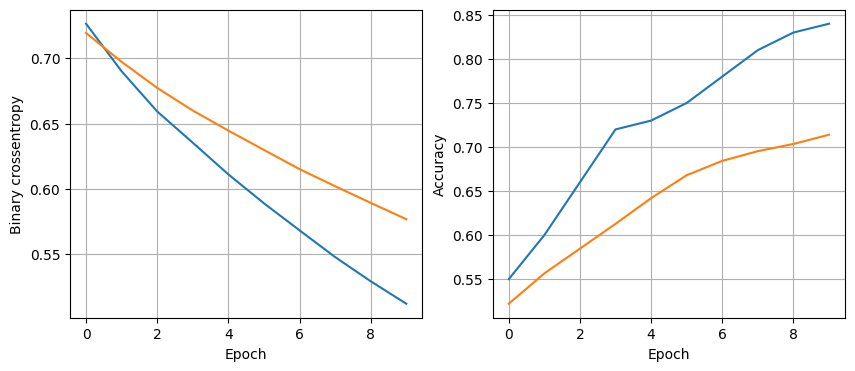

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7505 - loss: 0.5807 


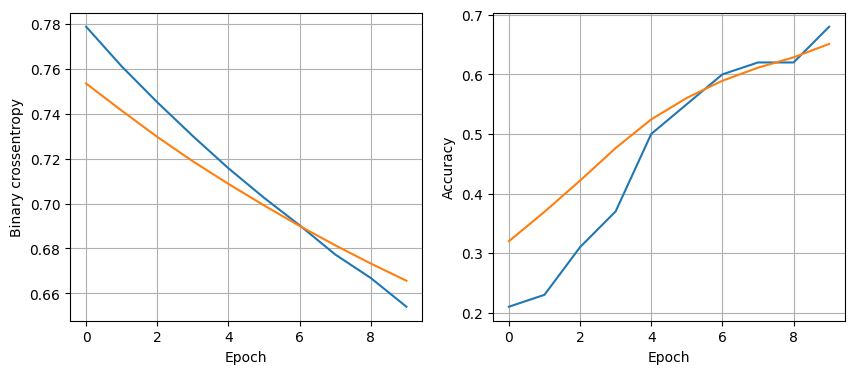

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6635 - loss: 0.6742


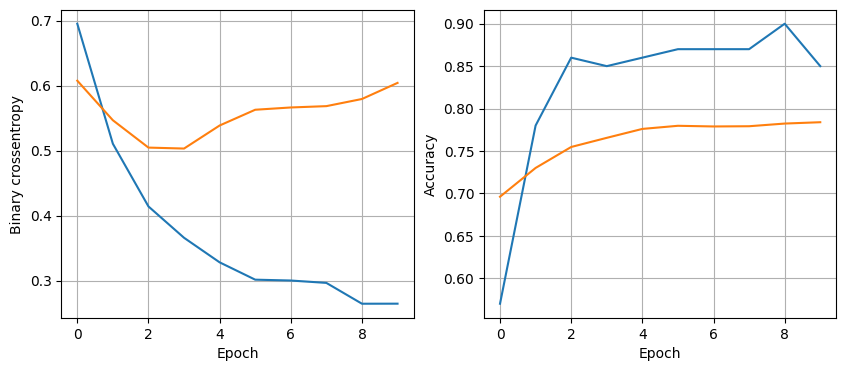

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8068 - loss: 0.6503 


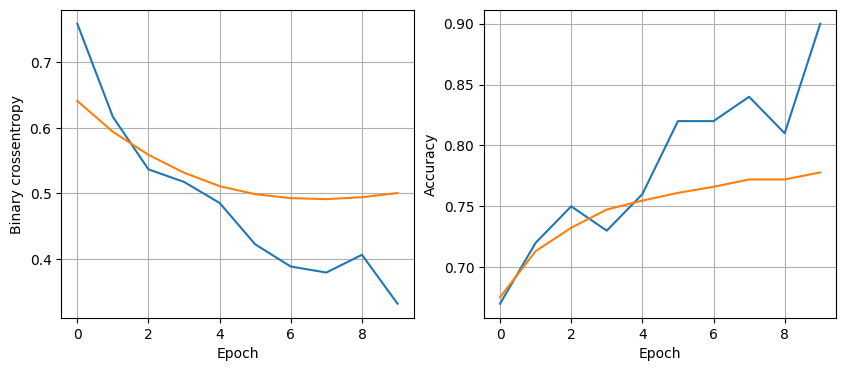

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7945 - loss: 0.5005


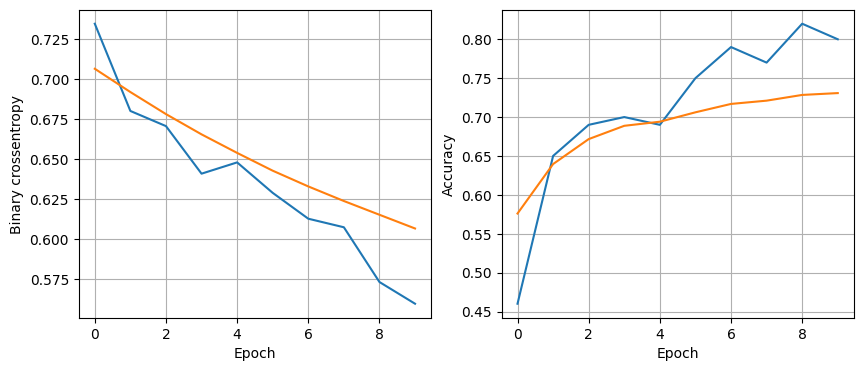

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7759 - loss: 0.5967


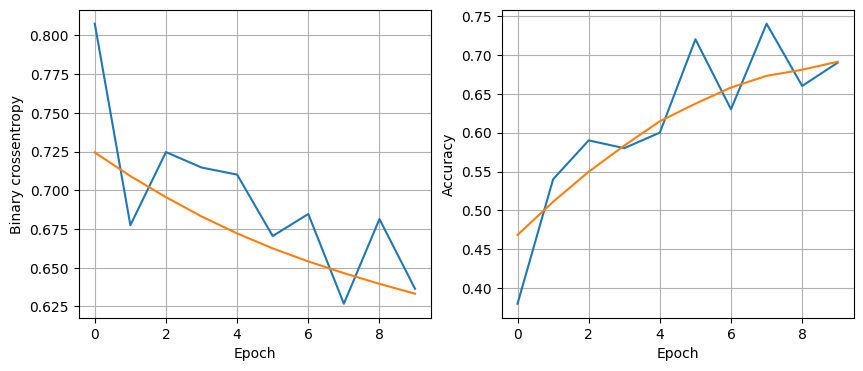

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7411 - loss: 0.6322


In [ ]:
least_val_loss = float('inf')
least_loss_model = None

epochs = 10
for num_nodes in [16,32]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.001]:
      for batch_size in [32,64]:
        model , history = train_model(X_train[:100],y_train[:100],num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(X_val[:100],y_val[:100])[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.44      0.58      1343
           1       0.76      0.95      0.84      2461

    accuracy                           0.77      3804
   macro avg       0.79      0.70      0.71      3804
weighted avg       0.78      0.77      0.75      3804



# ***NEURAL NETWORK MANUAL IMPLEMENTATION***

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def sigmoid_derivative(a):
    return a * (1 - a)

In [ ]:
def relu(z):
    return np.maximum(0, z)

In [ ]:
def relu_derivative(z):
    return (z > 0).astype(float)

In [ ]:
def initialize_parameters(input_size, hidden_size):
    np.random.seed(42)
    w1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    w2 = np.random.randn(hidden_size, 1) * 0.01
    b2 = np.zeros((1, 1))
    return w1, b1, w2, b2

In [ ]:
def forward(X, w1, b1, w2, b2):
    Z1 = np.dot(X, w1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, w2) + b2
    A2 = sigmoid(Z2)
    return A2, (Z1, A1, Z2, A2)

# **Some cells left for completing the neural network manual implementation**

# **Till here**

# **LINEAR REGRESSION IMPLEMENTATION**

In [8]:
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [9]:
dataset_cols = ["bike_count" ,"hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]
df = pd.read_csv("SeoulBikeData.csv",encoding='cp949').drop(["Date","Holiday","Seasons"],axis=1)


In [10]:
df.columns = dataset_cols
df["functional"] = (df["functional"]=="Yes").astype(int)
df = df[df["hour"]==12]
df = df.drop(["hour"],axis=1)

In [11]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


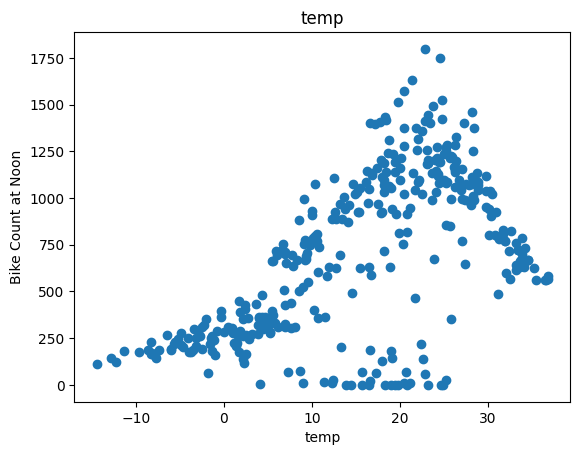

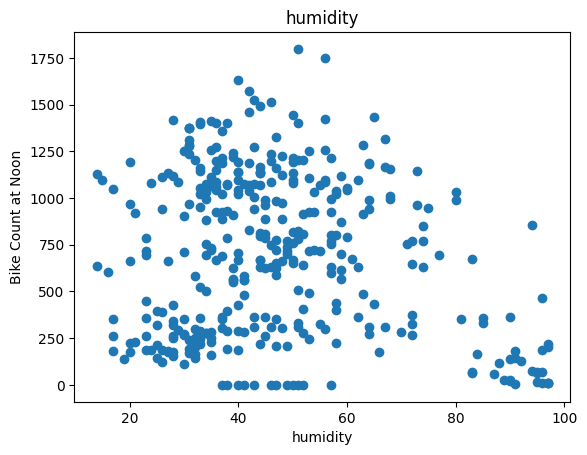

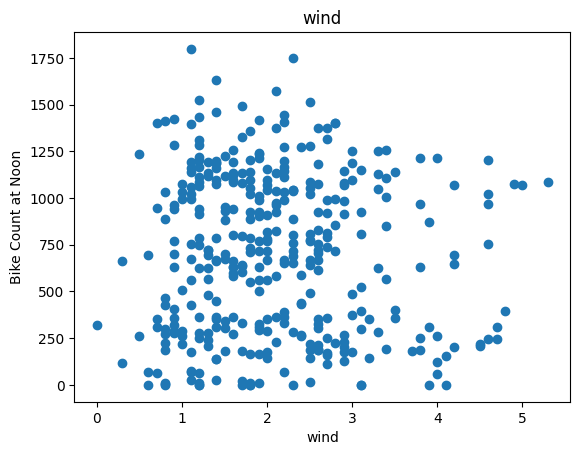

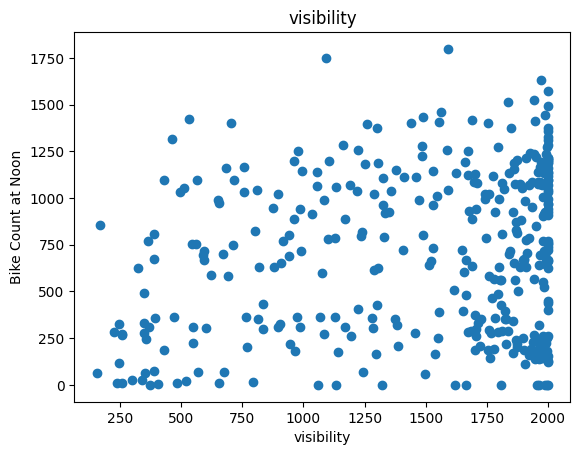

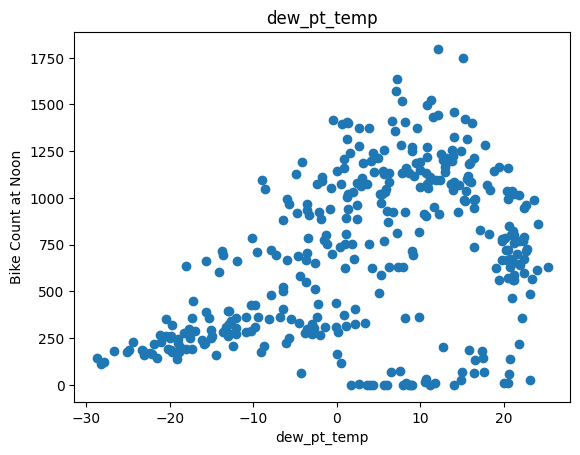

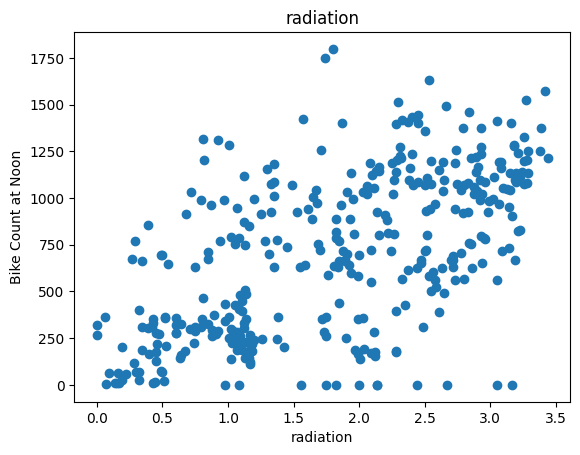

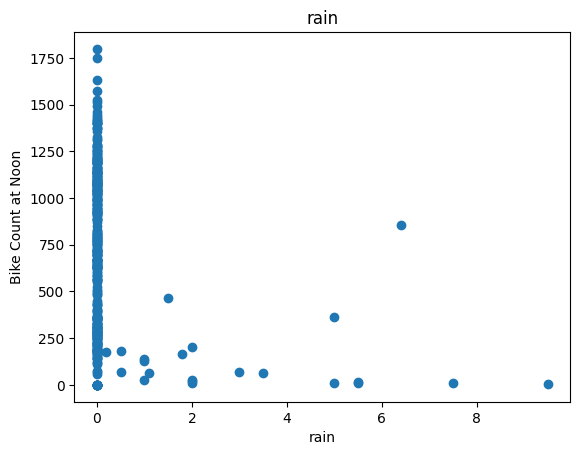

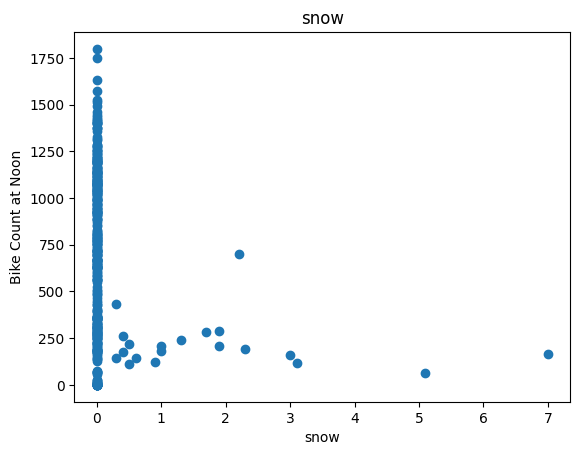

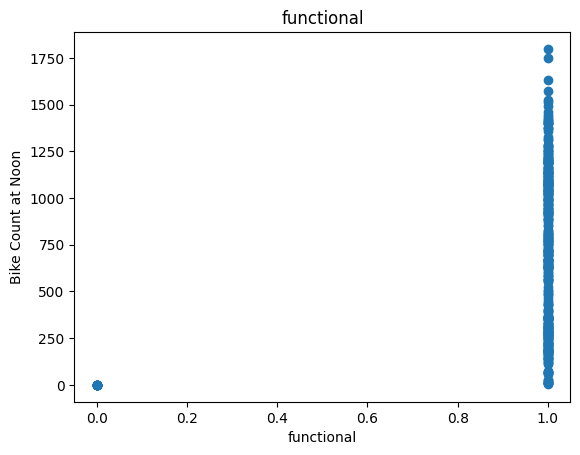

In [12]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [13]:
df = df.drop(["wind","visibility","functional"],axis=1)

# **TRAIN , VALID , TEST DATASET**

In [14]:
train , valid , test = np.split(df.sample(frac=1) , [int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [15]:
def get_xy(dataframe, y_labels,x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_labels]].values
  else:
    if len(x_labels)==1:
      X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_labels].values
  data = np.hstack((X,np.reshape(y,(-1,1))))

  return data , X , y

In [16]:
_, X_train_temp, y_train_temp = get_xy(train , "bike_count", x_labels=["temp"])
_, X_valid_temp, y_valid_temp = get_xy(valid , "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test , "bike_count", x_labels=["temp"])

In [17]:
temp_reg = LinearRegression()
temp_reg = temp_reg.fit(X_train_temp,y_train_temp)

In [18]:
temp_reg.score(X_test_temp,y_test_temp)

0.17930612599215767

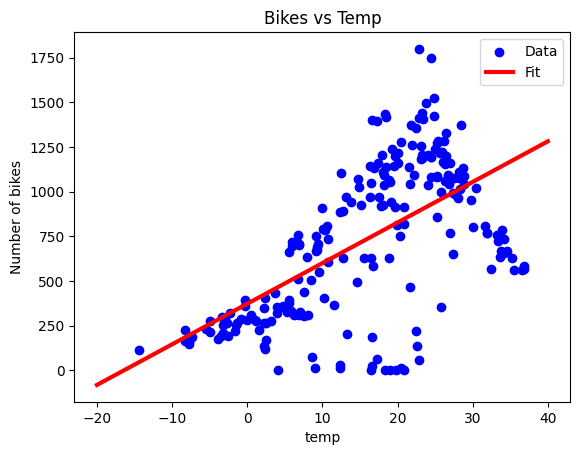

In [19]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.xlabel("temp")
plt.ylabel("Number of bikes")
plt.title("Bikes vs Temp")
plt.legend()
plt.show()

# **LINEAR REGRESSION MANUAL IMPLEMENTATION**

In [20]:
m = X_train_temp[:100].shape[0]
w = 0
b = 0
learning_rate = 0.01
epochs = 1000

In [22]:
for i in range(epochs):
  f_wb = w*X_train_temp[:100] + b
  error = f_wb - y_train_temp
  cost = (1/(2*m)) * np.sum(error**2)

In [23]:
dw = (1/m ) * np.sum(error*X_train_temp[:100])
db = (1/m) * np.sum(error)

w -= learning_rate*dw
b -= learning_rate*db

if(i%100==0):
  print(f"Epoch {i}: Cost={cost:.4f},w={w:.4f},b={b:.4f}")

print(f"\nFinal model: y= {w:.2f}x + {b:.2f}")


Final model: y= 25847.08x + 1605.01


# **MULTIVARIATE LINEAR REGRESSION IMPLEMENTATION**

In [25]:
train , valid , test = np.split(df.sample(frac=1),[int(0.6*len(df)) , int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [26]:
_, X_train_all , y_train_all = get_xy(train , "bike_count", x_labels = df.columns[1:])
_, X_valid_all , y_valid_all = get_xy(valid , "bike_count", x_labels = df.columns[1:])
_, X_test_all , y_test_all = get_xy(test , "bike_count", x_labels = df.columns[1:])

In [28]:
all_reg = LinearRegression()
all_reg = all_reg.fit(X_train_all,y_train_all)

In [31]:
all_reg.score(X_test_all,y_test_all)

0.36504146995934705

# **MULTIVARIATE LINEAR REGRESSION MANUAL IMPLEMENTATION**

In [47]:
def multivariate_linreg(X,y,epochs,learning_rate):
  m,n = X.shape
  w = np.zeros(n)
  b = 0

  for i in range(epochs):
    f_wb = np.dot(X,w) + b
    error = (f_wb - y)
    cost = (1/(2*m)) * np.sum(error**2)

    dw = (1/m) * np.dot(X.T,error)
    db = (1/m) * np.sum(error)

    w -= learning_rate * dw
    b -= learning_rate * db
    if(i%100==0):
       print(f"Epoch {i}: Cost={cost},w={w},b={b}")

  print(f"\nFinal model: y= {w}x + {b}")
  return w , b

In [52]:
epochs = 100
learning_rate = 0.001
w , b = multivariate_linreg(X_train_all[:100],y_train_all[:100],epochs,learning_rate)


Epoch 0: Cost=386800.3,w=[1.5835219e+01 3.2447930e+01 4.9799480e+00 1.7995737e+00 6.7500000e-04
 1.7713000e-02],b=0.77336

Final model: y= [-1.67329611e+15 -4.12382230e+15 -6.40583767e+14 -1.73458146e+14
 -1.40475731e+13 -9.51232633e+12]x + -85721409371601.94


# **REGRESSION USING NEURAL NETWORK**

In [53]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,) , axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1,1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [55]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [60]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1,1), y_train_temp,
    verbose=0,
    epochs = 100,
    validation_data = (X_valid_temp,y_valid_temp)
)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


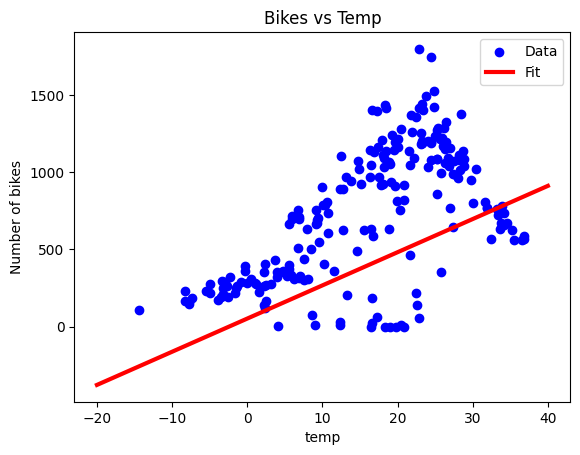

In [62]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.xlabel("temp")
plt.ylabel("Number of bikes")
plt.title("Bikes vs Temp")
plt.legend()
plt.show()

# **K-MEANS IMPLEMENTATION**

In [69]:
cols = ["area","perimeter","compactness","length","width","asymmetry","groove","class"]
df = pd.read_csv("seeds_dataset.txt",names=cols,sep="\s+")
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


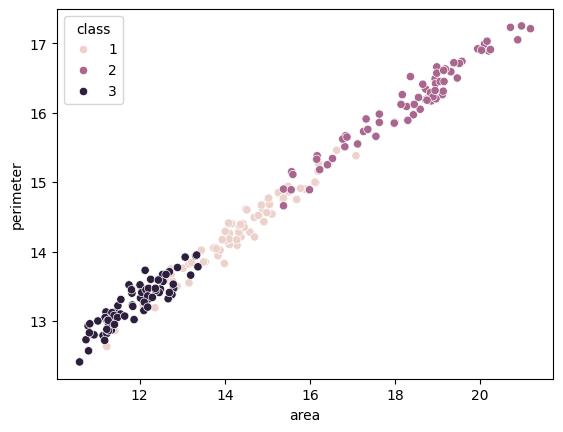

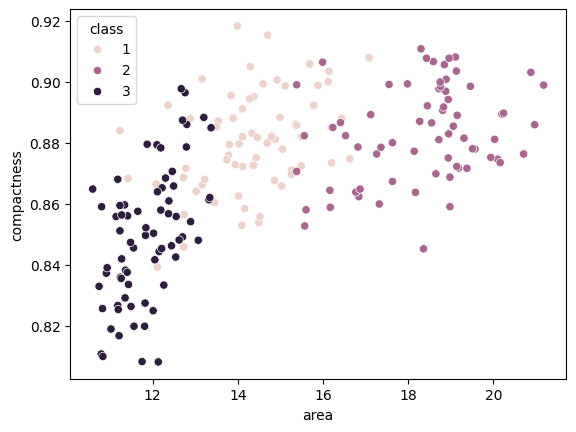

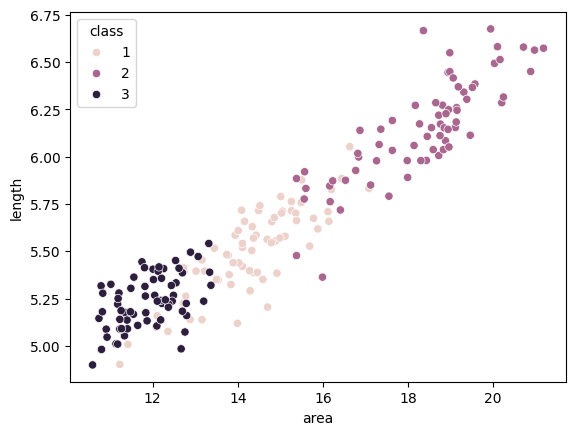

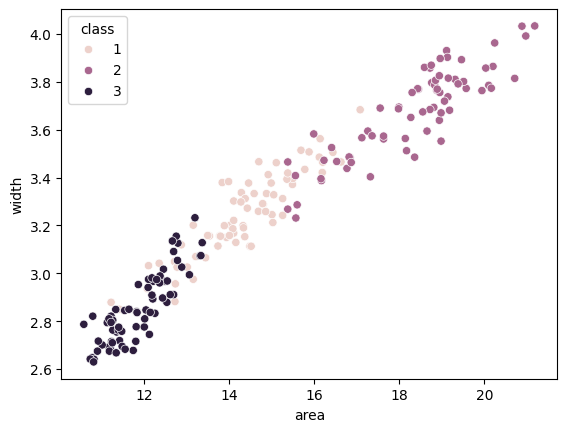

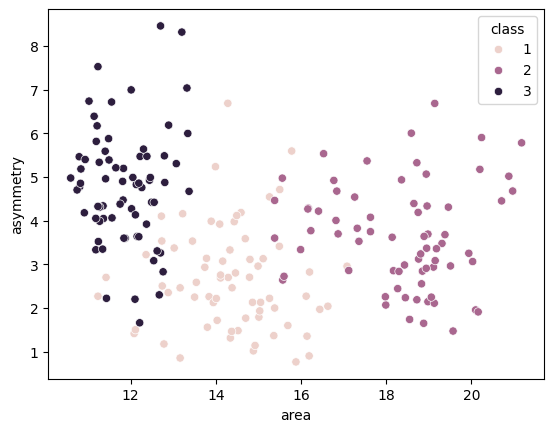

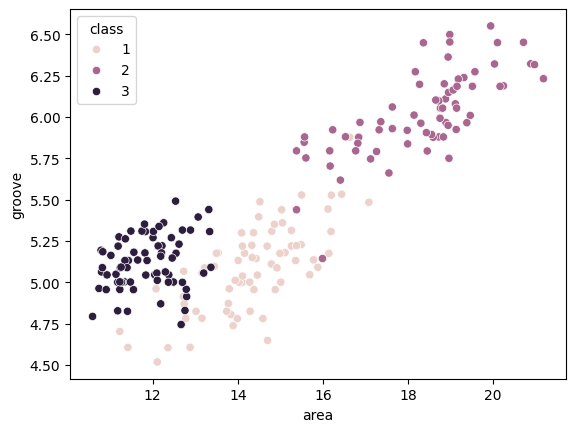

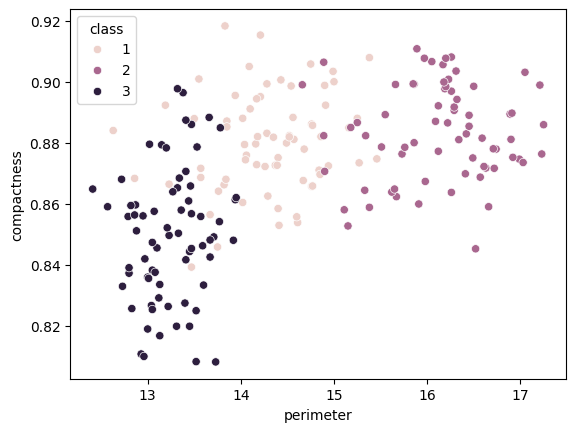

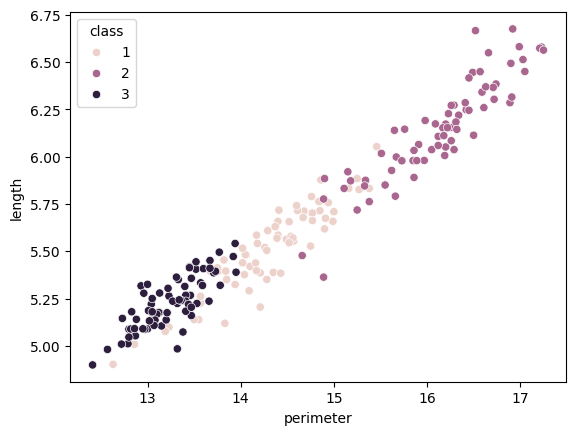

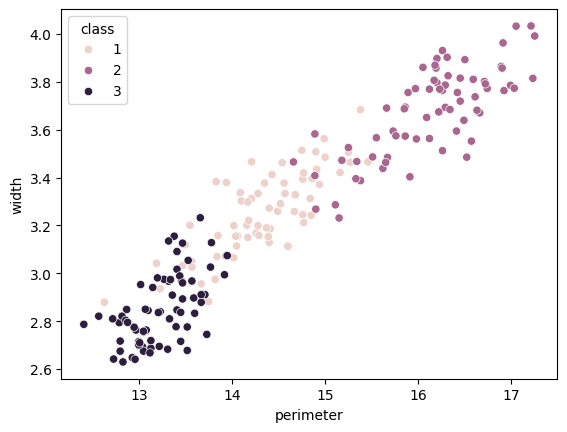

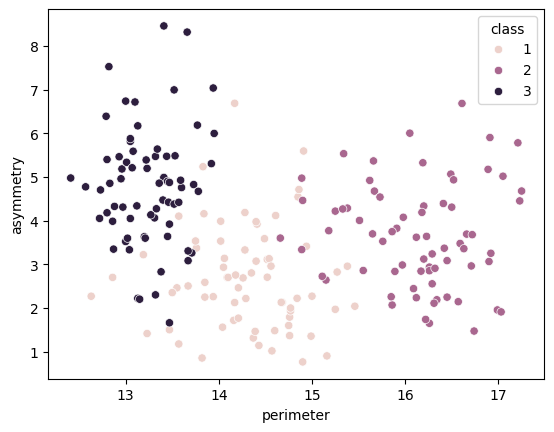

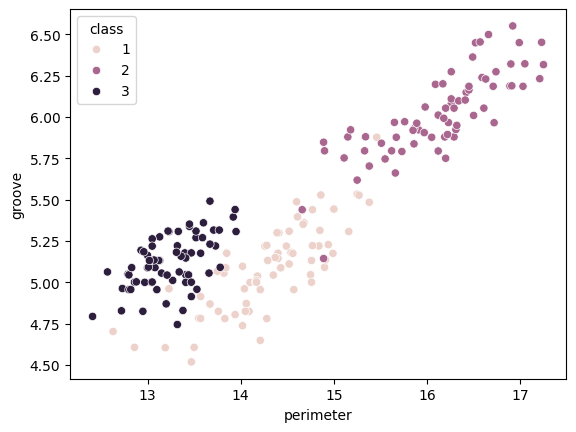

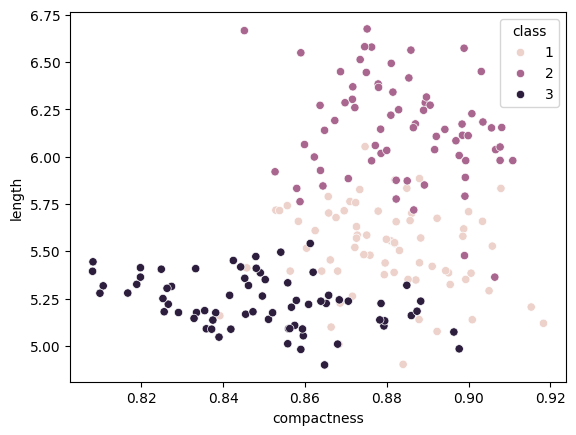

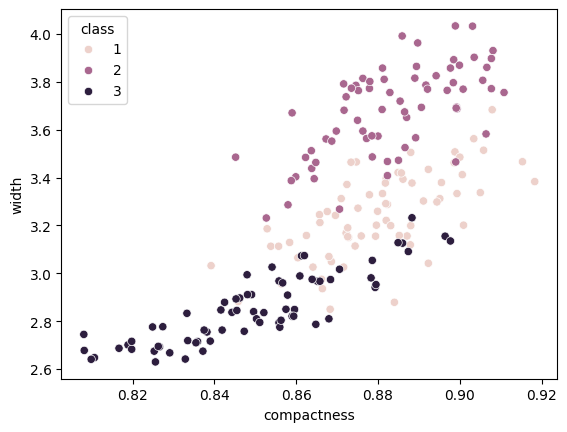

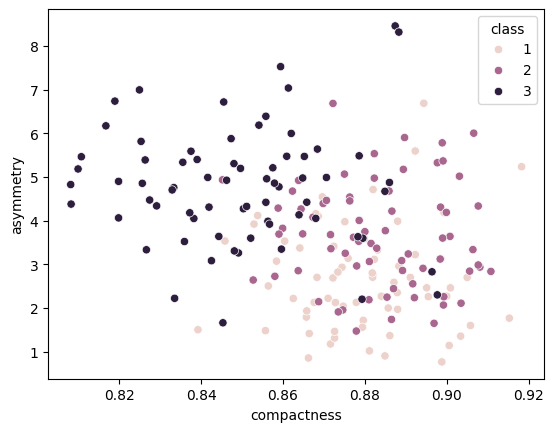

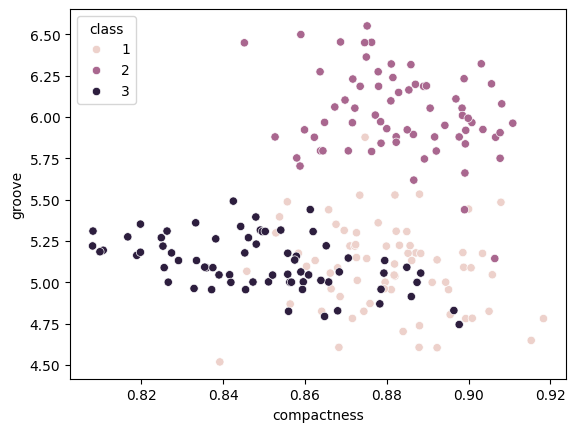

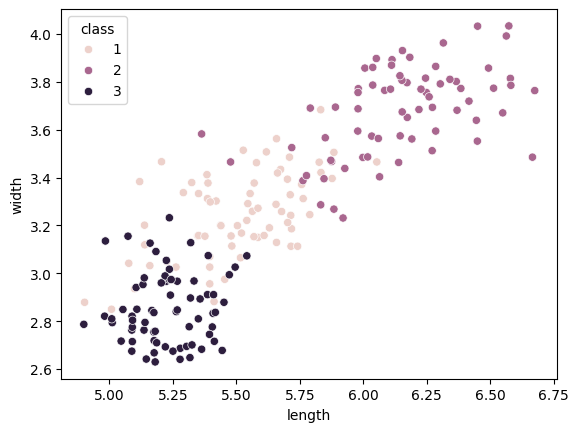

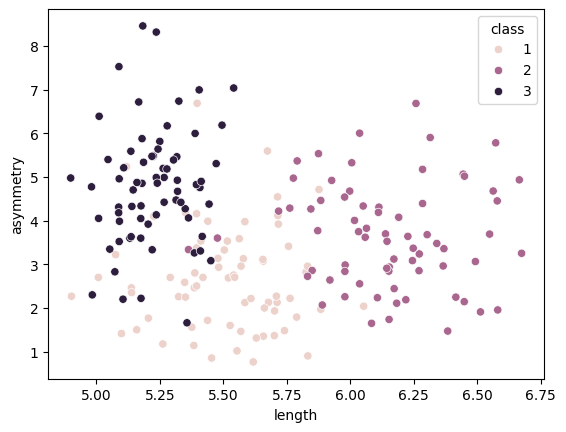

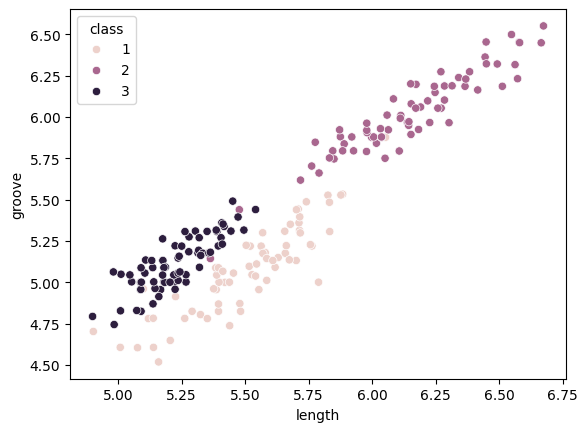

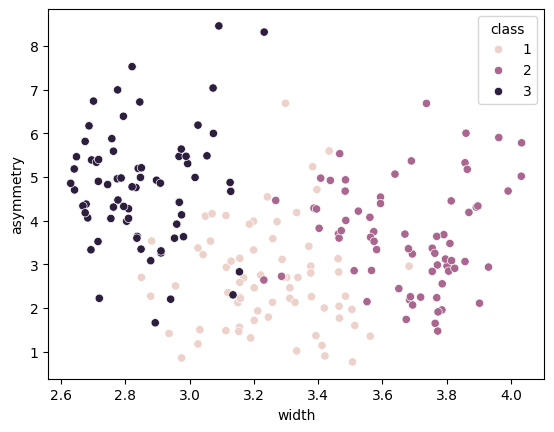

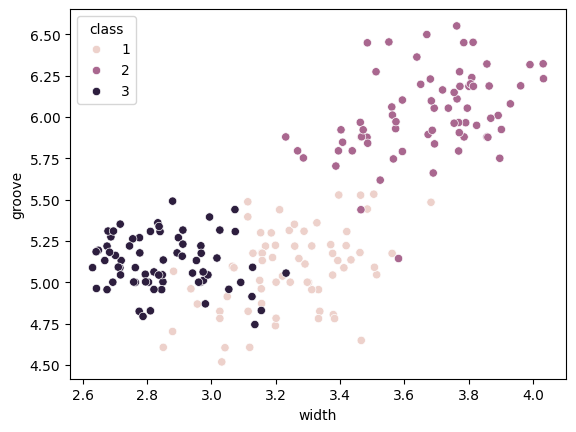

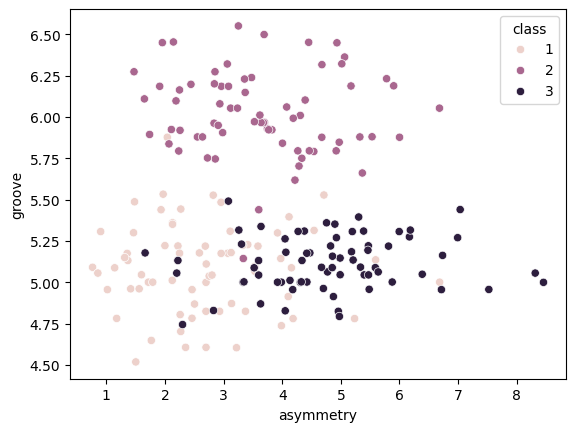

In [71]:
for i in range(len(cols)-1):
  for j in range(i+1,len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label,y=y_label,data=df,hue='class')
    plt.show()

In [72]:
from sklearn.cluster import KMeans

In [73]:
x = "perimeter"
y = "asymmetry"
X = df[[x,y]].values

In [96]:
kmeans = KMeans(n_clusters = 3).fit(X)

In [97]:
clusters = kmeans.labels_

In [98]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int32)

In [99]:
cluster_df = pd.DataFrame(np.hstack((X,clusters.reshape(-1,1))),columns=[x,y,'class'])

In [100]:
cluster_df.head()

,perimeter,asymmetry,class
0,14.84,2.221,0.0
1,14.57,1.018,0.0
2,14.09,2.699,0.0
3,13.94,2.259,0.0
4,14.99,1.355,0.0


[]

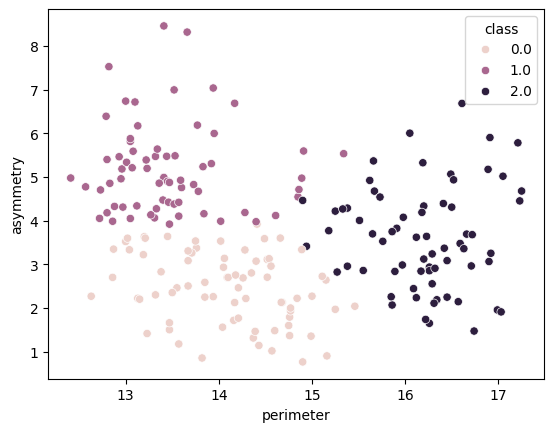

In [102]:
# KMeans classes
sns.scatterplot(x=x,y=y,hue='class',data=cluster_df)
plt.plot()

[]

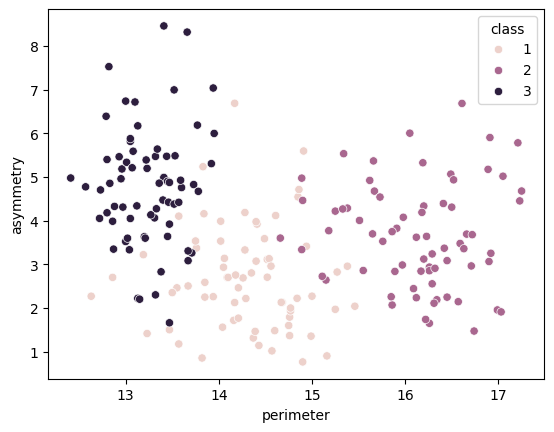

In [103]:
# Original classes
sns.scatterplot(x=x,y=y,hue='class',data=df)
plt.plot()

# **HIGHER DIMENSIONS**

In [104]:
X = df[cols[:-1]].values

In [105]:
kmeans = KMeans(n_clusters = 3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X , clusters.reshape(-1,1))),columns=df.columns)

[]

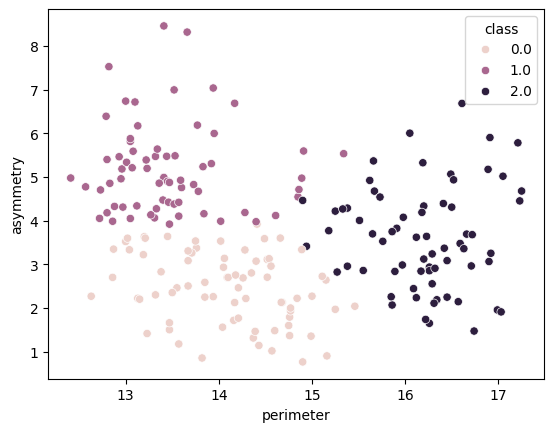

In [106]:
# K-Means classes
sns.scatterplot(x=x,y=y,hue='class',data=cluster_df)
plt.plot()

# **PCA**

In [107]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [110]:
X.shape

(210, 7)

In [109]:
transformed_x.shape

(210, 2)

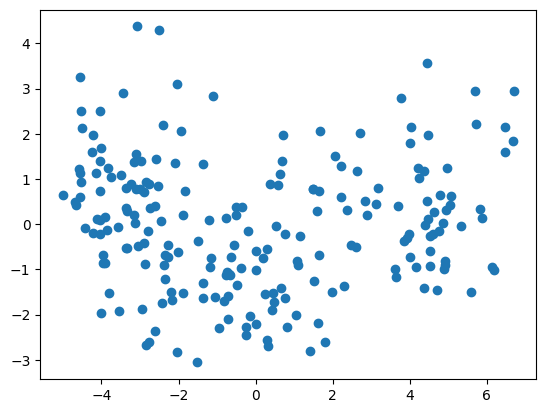

In [112]:
plt.scatter(transformed_x[:,0],transformed_x[:,1])
plt.show()

In [117]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1,1))),columns = ["pca1","pca2","class"])

In [118]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x,df["class"].values.reshape(-1,1))),columns = ["pca1","pca2","class"])

[]

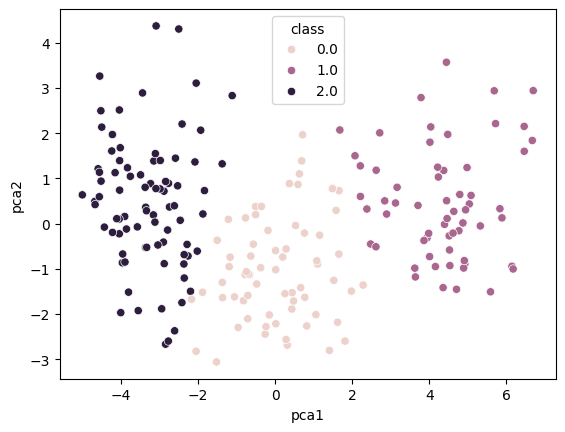

In [120]:
# K-Means classes
sns.scatterplot(x="pca1",y="pca2",hue='class',data=kmeans_pca_df)
plt.plot()

[]

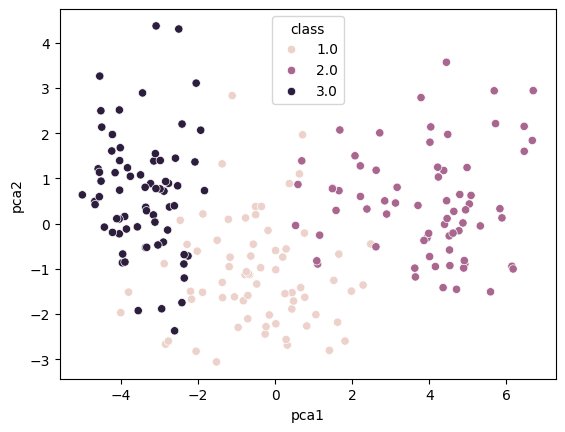

In [122]:
# truth classes
sns.scatterplot(x="pca1",y="pca2",hue='class',data=truth_pca_df)
plt.plot()